In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using Plots, Interact, LinearAlgebra, ForwardDiff
gr(size=(600,400))
contour(1:10, 1:10, atan)
nothing

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1278
┌ Warning: `@get!(dict, key, default)` at /home/abel/.julia/packages/WebIO/nTMDV/src/scope.jl:160 is deprecated, use `get!(()->default, dict, key)` instead.
└ @ Base deprecated.jl:204
┌ Warning: `@get!(dict, key, default)` at /home/abel/.julia/packages/WebIO/nTMDV/src/scope.jl:357 is deprecated, use `get!(()->default, dict, key)` instead.
└ @ Base deprecated.jl:204


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11664586514106986420\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-15337381917327930778\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11664586514106986420\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

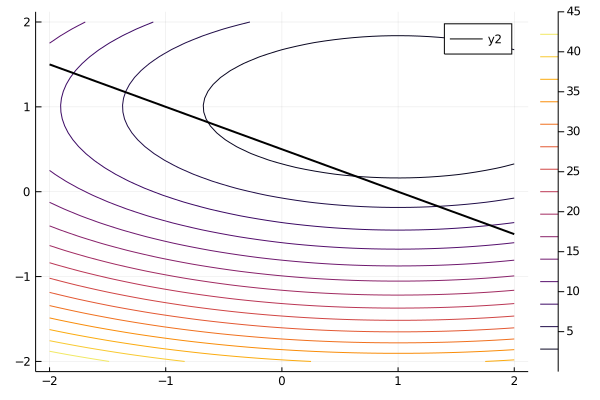

In [8]:
f(x) = (x[1] - 1)^2 + 4 * (x[2] - 1)^2
xg = range(-2, 2, length=50)
yg = range(-2, 2, length=50)
contour(xg, yg, (x,y) -> f([x;y]))

# y = 1 - 0.5 * (x + 1)
plot!(x -> 1 - 0.5 * (x + 1), xg[1], xg[end], c=:black, lw=2)
# 0.5 x + y = 1 - 0.5
# x + 2y = 1

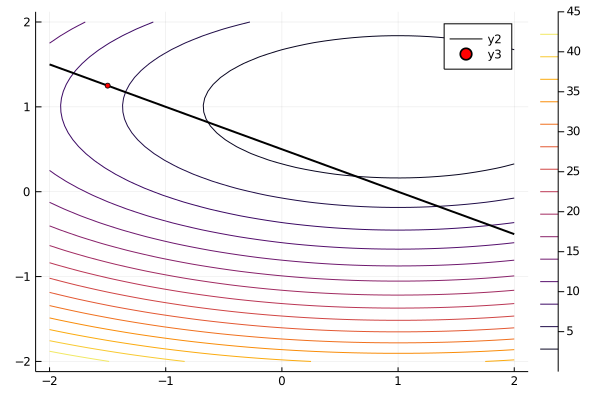

In [38]:
A = [1.0 2.0]
b = [1.0]
x₀ = [-1.5; 1.25]
contour(xg, yg, (x,y) -> f([x;y]))
plot!(x -> 1 - 0.5 * (x + 1), xg[1], xg[end], c=:black, lw=2)
scatter!([x₀[1]], [x₀[2]], c=:red, ms=3)

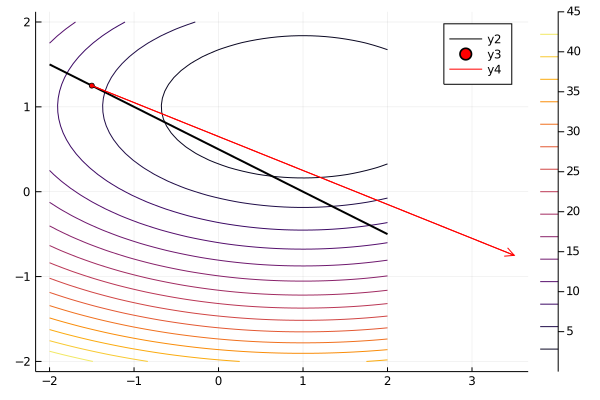

In [40]:
using ForwardDiff
g = ForwardDiff.gradient(f, x₀)
contour(xg, yg, (x,y) -> f([x;y]))
plot!(x -> 1 - 0.5 * (x + 1), xg[1], xg[end], c=:black, lw=2)
scatter!([x₀[1]], [x₀[2]], c=:red, ms=3)
plot!(x₀[1] .+ [0, -g[1]], x₀[2] .+ [0, -g[2]], c=:red, l=:arrow)

In [41]:
Z = [A[2]; -A[1]]
Z = Z / norm(Z, 2)

2-element Array{Float64,1}:
  0.8944271909999159
 -0.4472135954999579

In [42]:
A * Z

1-element Array{Float64,1}:
 0.0

In [43]:
d = -Z * Z' * g

2-element Array{Float64,1}:
  4.8
 -2.4

In [44]:
A * d

1-element Array{Float64,1}:
 0.0

In [45]:
x₁ = x₀ + d

2-element Array{Float64,1}:
  3.3
 -1.15

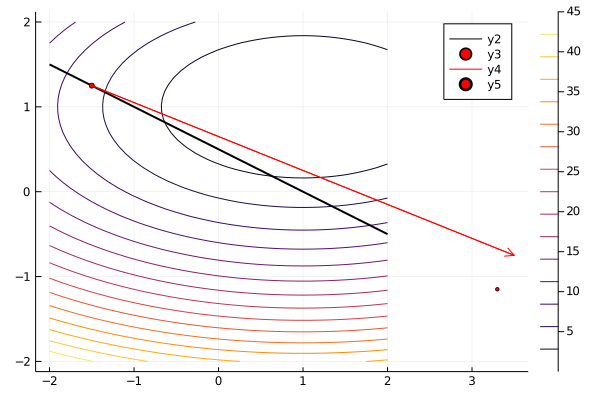

In [46]:
contour(xg, yg, (x,y) -> f([x;y]))
plot!(x -> 1 - 0.5 * (x + 1), xg[1], xg[end], c=:black, lw=2)
scatter!([x₀[1]], [x₀[2]], c=:red, ms=3)
plot!(x₀[1] .+ [0, -g[1]], x₀[2] .+ [0, -g[2]], c=:red, l=:arrow)
scatter!([x₁[1]], [x₁[2]], c=:red, ms=2)

In [23]:
Z * Z'

2×2 Array{Float64,2}:
  4.0  -2.0
 -2.0   1.0

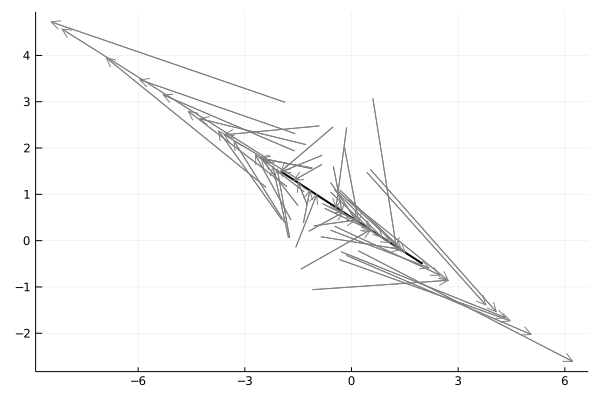

In [28]:
p = plot(x -> 1 - 0.5 * (x + 1), xg[1], xg[end], c=:black, lw=2, leg=false)
for k = 1:50
    d = randn(2)
    y = x₀ + Z * Z' * d
    plot!([x₀[1] + d[1], y[1]], [x₀[2] + d[2], y[2]], c=:gray, l=:arrow)
end
p

In [47]:
A = rand(3, 7)

3×7 Array{Float64,2}:
 0.888534  0.247026  0.799251  0.893745  0.511707  0.787303  0.834333
 0.145222  0.569468  0.6994    0.219021  0.402133  0.175301  0.363529
 0.37028   0.615131  0.925684  0.900455  0.627692  0.976205  0.595709

In [48]:
rank(A)

3

In [51]:
using LinearAlgebra
QR = qr(A')
Q = QR.Q
Z = Q[:,4:end]

7×4 Array{Float64,2}:
 -0.330175   -0.135273   -0.184618   -0.455736
 -0.296189   -0.422656   -0.507852    0.00603213
  0.33207    -0.0683281   0.59617    -0.305794
  0.652797   -0.0692424  -0.438532   -0.0472249
 -0.169113    0.884579   -0.220078   -0.0509448
 -0.487902   -0.0964107   0.326459    0.0272834
 -0.0139522  -0.0427208   0.0725498   0.832579

In [52]:
rank(Z)

4

In [53]:
A * Z

3×4 Array{Float64,2}:
 1.10599e-16  2.20646e-16  1.43437e-16   2.4093e-16
 3.48345e-17  1.20297e-16  7.93899e-17  -2.98901e-17
 3.74446e-18  1.50754e-16  1.01456e-16  -2.87483e-17

In [60]:
# Ω: x² + y² ≤ 1
# f(x) = ((x[1] - 0.8)^2 + 4 * (x[2] + 0.1)^2) / 10
f(x) = (x[1] - 1)^2 + 4 * (x[2] - x[1]^2)^2

∇f(x) = ForwardDiff.gradient(f, x)

xg = range(-2, 2, length=50)
yg = range(-2, 2, length=50)
θ = range(0, 2π, length=60)

A = [1.0 2.0]
b = [1.0]
# ℓ = [-0.5; -1.2]
# u = [0.5;  0.7]
# P(x) = norm(x) ≤ 1 ? x : x / norm(x)
# P(x) = [min(u[i], max(x[i], ℓ[i])) for i = 1:2]
# R = [cos(π / 4) sin(π / 4); -sin(π / 4) cos(π / 4)]
# P(x) = R' * clamp.(R * x, -sqrt(2) / 2, sqrt(2) / 2)

x₀ = [-1.0; 1.0]
Z = [2.0; -1.0]
Z = Z / norm(Z)

P(x) = Z * Z' * (x - x₀) + x₀

@manipulate for α = range(-1, 3, length=200)
    contour(xg, yg, (x,y) -> f([x;y]), levels=50, leg=false)

#     plot!(cos.(θ), sin.(θ), c=:black, lw=2, fill=true, opacity=0.5, lab="Ω")
#     plot!([ℓ[1], ℓ[1], u[1], u[1], ℓ[1]], [ℓ[2], u[2], u[2], ℓ[2], ℓ[2]], c=:black, fill=true, lw=2, opacity=0.5)
#     plot!([1,  0, -1, 0, 1], [0, 1, 0, -1, 0], c=:black, fill=true, lw=2, opacity=0.5)
#     x = [x1; x2]
    x = x₀ + Z * α
    d = -∇f(x)
    y = x + d
    z = P(x + d)

    contour!(xg, yg, (x,y) -> f([x;y]), levels=[f(x)], c=:red, ratio=:equal)
    plot!([x[1], y[1]], [x[2], y[2]], c=:red, l=:arrow, lab="", m=(2))
    plot!([z[1], y[1]], [z[2], y[2]], c=:red, l=:dash, lab="", m=(2))
    for t = range(0, 1, length=50)
        Px = P(x + t * d)
        scatter!([Px[1]], [Px[2]], c=:blue, ms=2)
    end
    xlims!(xg[1], xg[end])
    ylims!(xg[1], xg[end])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 200,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
100, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f94fb049600, Task (runnable) @0x00007f94fb049600), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-1.0\",\"-0.979899\",\"-0.959799\",\"-0.939698\",\"-0.919598\",\"-0.899497\",\"-0.879397\",\"-0.859296\",\"-0.839196\",\"-0.819095\",\"-0.798995\",\"-0.778894\",\"-0.758794\",\"-0.738693\",\"-0.718593\",\"-0.698492\",\"-0.678392\",\"-0.658291\",\"-0.638191

In [74]:
using LinearAlgebra

function gradiente(f, A, b, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    m, n = size(A)
    Z = qr(A').Q[:,m+1:end]
    if norm(A * x - b) > 1e-8
        x = x - A' * ( (A * A') \ (A * x - b) )
        @assert norm(A * x - b) < 1e-8
    end
    
    fx = f(x)
    gx = ∇f(x)
    d = -Z * Z' * gx
    
    iter = 0
    resolvido = norm(gx) < 1e-4
    cansado = iter > 1000
    
    while !(resolvido || cansado)
        t = 1.0
        xt = x + t * d
        ft = f(xt)
        while ft ≥ fx + 1e-2 * t * dot(gx, d)
            t = t / 2
            xt = x + t * d
            ft = f(xt)
            if t < 1e-8
                break
            end
        end
        x = xt
        fx = ft
        gx = ∇f(x)
        d = -Z * Z' * gx
        
        resolvido = norm(d) < 1e-4
        cansado = iter > 1000 || t < 1e-8
        iter += 1
    end
    
    return x, fx, iter
end

gradiente (generic function with 2 methods)

In [72]:
x, _ = gradiente(f, A, b, [-1.2; 1.0])

([0.5460994292086223, 0.22695028539568843], 0.22634583220311705, 6)

In [73]:
∇f(x)

2-element Array{Float64,1}:
 -0.28503545846149225
 -0.5701944094903573

In [83]:
function newton(f, A, b, x)
    ∇f(x) = ForwardDiff.gradient(f, x)
    H(x) = ForwardDiff.hessian(f, x)
    m, n = size(A)
    if norm(A * x - b) > 1e-8
        x = x - A' * ( (A * A') \ (A * x - b) )
        @assert norm(A * x - b) < 1e-8
    end
    
    fx = f(x)
    gx = ∇f(x)
    y = zeros(m)
    
    iter = 0
    resolvido = norm(gx) < 1e-4
    cansado = iter > 1000
    
    while !(resolvido || cansado)
        Hx = H(x)
        ρ = 0.0
        while any(eigen(Hx + ρ * I).values .≤ 0)
            ρ = max(10ρ, 1e-8)
        end
        K = [Hx + ρ * I          A';
             A           -1e-8 * I]
        rhs = -[gx + A' * y; A * x - b]
        d = K \ rhs
        Δx, Δy = d[1:n], d[n+1:end]
        
        t = 1.0
        xt = x + t * Δx
        ft = f(xt)
        while ft ≥ fx + 1e-2 * t * dot(gx, Δx)
            t = t / 2
            xt = x + t * Δx
            ft = f(xt)
            if t < 1e-8
                break
            end
        end
        x = xt
        y = y + t * Δy
        fx = ft
        gx = ∇f(x)
        
        resolvido = norm(gx + A' * y) < 1e-4
        cansado = iter > 1000 || t < 1e-8
        iter += 1
    end
    
    return x, y, fx, iter, resolvido, cansado
end

newton (generic function with 1 method)

In [84]:
x, y, _, _ = newton(f, A, b, [-1.2; 1.0])

([0.5460973580644277, 0.2269513209561437], [0.2850826290815481], 0.22634583213210357, 12, true, false)

In [85]:
∇f(x) + A' * y

2-element Array{Float64,1}:
  1.185294929012537e-5
 -2.770067336510529e-6

In [86]:
eigen(ForwardDiff.hessian(f, x)).values

2-element Array{Float64,1}:
  1.2958094524134944
 19.387640987565703